In [1]:
import os.path
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.decomposition import LatentDirichletAllocation
#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
from sklearn.decomposition import TruncatedSVD
# for named entity recognition (NER)
from nltk import ne_chunk
nltk.download('wordnet')
from sklearn.model_selection import GridSearchCV
from textblob import TextBlob

/Users/rawanawad/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rawanawad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('/Users/rawanawad/Downloads/yelp2.csv')
data.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5.0,HIGH,1.0,4.0,3,0.0,0.0,0.0,0.0,0,0.0,1.0,3,0,0.0,0.0,0.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4.0,HIGH,1.0,3.0,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,0.0,0.0,0.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4.0,HIGH,1.0,2.0,2,0.0,0.0,3.0,0.0,0,0.0,0.0,-1,2,0.0,0.0,0.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2.0,LOW,0.0,1.0,0,0.0,0.0,-1.0,-1.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4.0,HIGH,1.0,2.0,0,0.0,0.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,0.0


In [3]:
data.review_text

0        11/25/2016 1 check-in Love love loved the vib...
1        12/2/2016 Listed in Date Night: Austin, vibe ...
2        11/30/2016 1 check-in Listed in food seating ...
3        11/25/2016 Very cool vibe! Good drinks Nice s...
4        12/3/2016 1 check-in They are location within...
                              ...                        
7616                                                  NaN
7617                                                  NaN
7618                                                  NaN
7619                                                  NaN
7620                                                  NaN
Name: review_text, Length: 7621, dtype: object

# Data Inspecting and exploring

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7616 non-null   object 
 1   review_text       7616 non-null   object 
 2   rating            7616 non-null   object 
 3   num_rating        7616 non-null   float64
 4   cat_rating        7616 non-null   object 
 5   bool_HIGH         7616 non-null   float64
 6   overall_sent      7616 non-null   float64
 7   vibe_sent         4507 non-null   object 
 8   tea_sent          7616 non-null   float64
 9   service_sent      7616 non-null   float64
 10  seating_sent      7616 non-null   float64
 11  price_sent        7616 non-null   float64
 12  parking_sent      7616 non-null   object 
 13  location_sent     7616 non-null   float64
 14  alcohol_sent      7616 non-null   float64
 15  coffee_sent       7616 non-null   object 
 16  food_sent         7616 non-null   object 


In [5]:
data.describe()

,num_rating,bool_HIGH,overall_sent,tea_sent,service_sent,seating_sent,price_sent,location_sent,alcohol_sent,hours_sent,internet_sent,local_sent
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7615.000000,7616.000000,7616.000000
mean,4.169118,0.806197,1.107537,0.047006,0.325105,0.124869,0.015362,0.074711,0.042936,0.031779,0.025210,0.035583
std,1.065311,0.395302,1.177984,0.330775,0.827549,0.521658,0.381999,0.395392,0.298598,0.274642,0.277679,0.271992
min,1.000000,0.000000,-4.000000,-3.000000,-4.000000,-3.000000,-3.000000,-4.000000,-3.000000,-3.000000,-3.000000,-1.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [6]:
data.isna().sum()

coffee_shop_name       5
review_text            5
rating                 5
num_rating             5
cat_rating             5
bool_HIGH              5
overall_sent           5
vibe_sent           3114
tea_sent               5
service_sent           5
seating_sent           5
price_sent             5
parking_sent           5
location_sent          5
alcohol_sent           5
coffee_sent            5
food_sent              5
hours_sent             6
internet_sent          5
local_sent             5
dtype: int64

In [7]:
data.shape

(7621, 20)

# Data Preprocessing 

In [8]:
data.columns

Index(['coffee_shop_name', 'review_text', 'rating', 'num_rating', 'cat_rating',
       'bool_HIGH', 'overall_sent', 'vibe_sent', 'tea_sent', 'service_sent',
       'seating_sent', 'price_sent', 'parking_sent', 'location_sent',
       'alcohol_sent', 'coffee_sent', 'food_sent', 'hours_sent',
       'internet_sent', 'local_sent'],
      dtype='object')

In [9]:
data = data.drop(['rating', 'cat_rating', 'bool_HIGH', 'overall_sent', 'vibe_sent','tea_sent','service_sent','seating_sent','price_sent','parking_sent','location_sent','alcohol_sent','coffee_sent','food_sent','hours_sent','internet_sent','local_sent'], axis=1)
data = data.rename(columns={'num_rating':'Stars', 'review_text':'Text', 'coffee_shop_name':'CoffeeName'})
data.head()

,CoffeeName,Text,Stars
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0


In [10]:
data.dropna(inplace=True)

In [11]:
data.isna().sum()

CoffeeName    0
Text          0
Stars         0
dtype: int64

In [12]:
stopwords=set(stopwords.words('english'))
stopwords2= stopwords.union({'good','great','one','get','would','could','always', 'like','also','food'})

In [13]:
data['SwText'] = data['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in (stopwords2)]))
data.head()

,CoffeeName,Text,Stars,SwText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...


In [14]:
le=WordNetLemmatizer()
data['LemmaText']=data['SwText'].apply(lambda x:le.lemmatize(x))

In [15]:
data['PunText'] = data['LemmaText'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation))) 
data.head()

,CoffeeName,Text,Stars,SwText,LemmaText,PunText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...


In [16]:
data['TokenText'] = data['PunText'].apply(lambda x: word_tokenize(x))
data.head()

,CoffeeName,Text,Stars,SwText,LemmaText,PunText,TokenText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc..."


In [17]:
data['CleanText']= data['TokenText'].apply(lambda x: ' '.join(x))

In [18]:
data.head()

,CoffeeName,Text,Stars,SwText,LemmaText,PunText,TokenText,CleanText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe...",11252016 1 checkin love love loved vibe every ...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a...",1222016 listed date night austin vibe austin b...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,...",11302016 1 checkin listed seating loved eclect...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ...",11252016 cool vibe drinks nice seating however...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc...",1232016 1 checkin location within northcross m...


In [19]:
data['NumCleanText']= data['CleanText'].apply(lambda x: x.translate(str.maketrans('','', string.digits))) 
data.head()

,CoffeeName,Text,Stars,SwText,LemmaText,PunText,TokenText,CleanText,NumCleanText
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe...",11252016 1 checkin love love loved vibe every ...,checkin love love loved vibe every corner co...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a...",1222016 listed date night austin vibe austin b...,listed date night austin vibe austin beautifu...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,...",11302016 1 checkin listed seating loved eclect...,checkin listed seating loved eclectic homey ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ...",11252016 cool vibe drinks nice seating however...,cool vibe drinks nice seating however everyth...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc...",1232016 1 checkin location within northcross m...,checkin location within northcross mall shop...


# Visualization

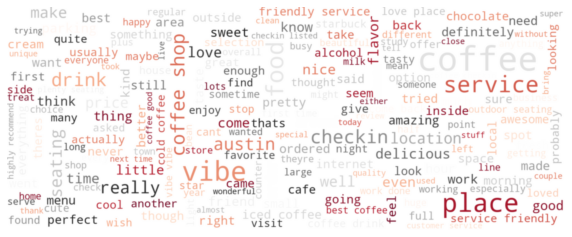

In [75]:
word_cloud = WordCloud(width = 2000,
                       height = 800,
                       colormap = 'RdGy_r', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(data['NumCleanText']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [63]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

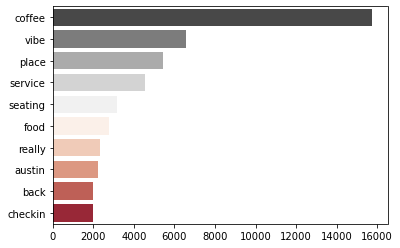

In [76]:
top_trigrams = get_top_ngram(data['NumCleanText'],1)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x, palette= 'RdGy_r')

# Topic Modeling

In [23]:
#fit the text to Tfidf vectorizer to weight every word depend on how much it appears in the text -most frequent word less weight-
vect =TfidfVectorizer(stop_words=stopwords)
vect_text=vect.fit_transform(data['NumCleanText'])
print(vect_text.shape)
print(vect_text)

(7616, 19532)
  (0, 8438)	0.18304271168048847
  (0, 10438)	0.12167710709844687
  (0, 13096)	0.2114585386723604
  (0, 9861)	0.2114585386723604
  (0, 6690)	0.10940678053430153
  (0, 6122)	0.21919936846123805
  (0, 7867)	0.1402086994108734
  (0, 18028)	0.14093271398477525
  (0, 8209)	0.15815457346061412
  (0, 10801)	0.11503469859293493
  (0, 19175)	0.14916727478022032
  (0, 7353)	0.0806146175490539
  (0, 17008)	0.15550578884377003
  (0, 2650)	0.21505154595630044
  (0, 16954)	0.14093271398477525
  (0, 9729)	0.1523365318119952
  (0, 4541)	0.18963836503105544
  (0, 378)	0.09772465081082433
  (0, 13749)	0.21919936846123805
  (0, 15038)	0.15159929158783905
  (0, 1505)	0.1498399994419382
  (0, 8566)	0.17415670545330014
  (0, 8932)	0.1595836305943054
  (0, 16535)	0.21505154595630044
  (0, 13291)	0.07949436708279028
  :	:
  (7614, 13893)	0.15525243607726413
  (7614, 6139)	0.15916332740614178
  (7614, 17185)	0.14486139893290922
  (7614, 18997)	0.15712368666608093
  (7614, 17409)	0.1669230637918608

In [24]:
idf=vect.idf_

In [25]:
# shows most frequent word and least frequent word
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)
print(l[0],l[-1])

coffee ⵋĩ


# Latent semantic analysis (LSA)

In [26]:
#defined the model
lsa_model = TruncatedSVD(n_components=3, random_state=42)
#fit the model
lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top)
print(lsa_top.shape)

[[ 0.20342264  0.08986944 -0.00759915]
 [ 0.1458228  -0.05290524  0.07769962]
 [ 0.27888708 -0.01994543 -0.00069393]
 ...
 [ 0.13592551 -0.16663677 -0.03447774]
 [ 0.14036757 -0.03892632 -0.01460168]
 [ 0.08947177 -0.05613802 -0.10056303]]
(7616, 3)


In [27]:
# weight of each topic in the document 
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  20.34226446942276
Topic  1  :  8.986944442457977
Topic  2  :  -0.7599149513698121


In [28]:
#words that has most weight to each topic
print(lsa_model.components_.shape) 
print(lsa_model.components_)

(3, 19532)
[[ 1.84139363e-04  1.45373994e-04  2.08334479e-04 ...  4.78230164e-05
   4.78230164e-05  9.56460327e-05]
 [ 2.44717752e-04 -1.79718285e-04 -2.18255248e-04 ... -3.12554635e-04
  -3.12554635e-04 -6.25109270e-04]
 [-4.00429626e-04  1.13526105e-04  3.26083840e-04 ... -2.29453673e-04
  -2.29453673e-04 -4.58907345e-04]]


In [29]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
coffee vibe place service seating 

Topic 1: 
coffee shop iced moon cup 

Topic 2: 
vibe seating internet work place 



# Sentiment Analysis

In [30]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Subjectivity'] = data['NumCleanText'].apply(getSubjectivity)
data['Polarity'] = data['NumCleanText'].apply(getPolarity)

In [31]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

#Show the data
data

,CoffeeName,Text,Stars,SwText,LemmaText,PunText,TokenText,CleanText,NumCleanText,Subjectivity,Polarity,Analysis
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0,11/25/2016 1 check-in love love loved vibe! ev...,11/25/2016 1 check-in love love loved vibe! ev...,11252016 1 checkin love love loved vibe every ...,"[11252016, 1, checkin, love, love, loved, vibe...",11252016 1 checkin love love loved vibe every ...,checkin love love loved vibe every corner co...,0.700000,0.356667,Positive
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0,"12/2/2016 listed date night: austin, vibe aust...","12/2/2016 listed date night: austin, vibe aust...",1222016 listed date night austin vibe austin b...,"[1222016, listed, date, night, austin, vibe, a...",1222016 listed date night austin vibe austin b...,listed date night austin vibe austin beautifu...,0.728571,0.367857,Positive
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0,11/30/2016 1 check-in listed seating loved ecl...,11/30/2016 1 check-in listed seating loved ecl...,11302016 1 checkin listed seating loved eclect...,"[11302016, 1, checkin, listed, seating, loved,...",11302016 1 checkin listed seating loved eclect...,checkin listed seating loved eclectic homey ...,0.511574,0.137963,Positive
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0,11/25/2016 cool vibe! drinks nice seating howe...,11/25/2016 cool vibe! drinks nice seating howe...,11252016 cool vibe drinks nice seating however...,"[11252016, cool, vibe, drinks, nice, seating, ...",11252016 cool vibe drinks nice seating however...,cool vibe drinks nice seating however everyth...,0.536111,0.022222,Positive
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0,12/3/2016 1 check-in location within northcros...,12/3/2016 1 check-in location within northcros...,1232016 1 checkin location within northcross m...,"[1232016, 1, checkin, location, within, northc...",1232016 1 checkin location within northcross m...,checkin location within northcross mall shop...,0.506590,0.298617,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0,2/19/2015 actually step restaurant chance favo...,2/19/2015 actually step restaurant chance favo...,2192015 actually step restaurant chance favori...,"[2192015, actually, step, restaurant, chance, ...",2192015 actually step restaurant chance favori...,actually step restaurant chance favorites aus...,0.606667,0.311111,Positive
7612,The Steeping Room,"1/21/2016 Ok, The coffeeing seating IS awesom...",5.0,"1/21/2016 ok, coffeeing seating awesome. many ...","1/21/2016 ok, coffeeing seating awesome. many ...",1212016 ok coffeeing seating awesome many menu...,"[1212016, ok, coffeeing, seating, awesome, man...",1212016 ok coffeeing seating awesome many menu...,ok coffeeing seating awesome many menu items ...,0.575000,0.387500,Positive
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0,"4/30/2015 loved coming tea, vibe pretty fresh....","4/30/2015 loved coming tea, vibe pretty fresh....",4302015 loved coming tea vibe pretty fresh ord...,"[4302015, loved, coming, tea, vibe, pretty, fr...",4302015 loved coming tea vibe pretty fresh ord...,loved coming tea vibe pretty fresh ordered st...,0.766667,0.416667,Positive
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0,8/2/2015 average. booths feel clean. waitstaff...,8/2/2015 average. booths feel clean. waitstaff...,822015 average booths feel clean waitstaff fri...,"[822015, average, booths, feel, clean, waitsta...",822015 average booths feel clean waitstaff fri...,average booths feel clean waitstaff friendly ...,0.583333,0.381944,Positive


In [32]:
pText = data[data.Analysis == 'Positive']
pText = pText['NumCleanText']

round((pText.shape[0] / data.shape[0]) * 100, 1)

90.9

In [33]:
pText = data[data.Analysis == 'Negative']
pText = pText['NumCleanText']

round((pText.shape[0] / data.shape[0]) * 100, 1)

8.0

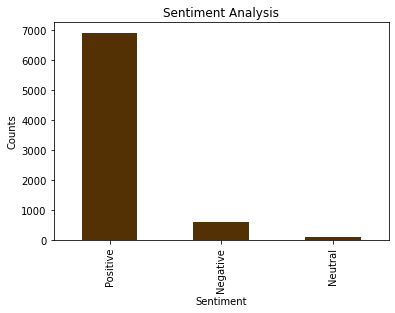

In [86]:
data['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar',colormap='BrBG')
plt.show()

In [35]:
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(vect_text, vect_text)

In [57]:
def recommend(text, df, limit=5):
    #get cos similarity between input (text) and reviews
    df['cos_similarity']=linear_kernel(vect_text,vect.transform([text]))
    
    #get top n similar reviews with unique coffe shop names
    sorted_df= df.sort_values('cos_similarity', ascending=False)
    recomended_list=[]
    for n in sorted_df['CoffeeName']:
        if n not in recomended_list:
            recomended_list.append(n)
        if len(recomended_list)==limit:
            break
    #return the list of coffe shops
    return recomended_list 
    

In [60]:
recommend('good atmosphere', data)

['Cafe Crème ',
 'Kick Butt Coffee Music & Booze ',
 "Russell's Bakery ",
 "Jo's Coffee ",
 'Tea Haus ']